In [1]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import glob
import driver

In [2]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
dt = constants.dt

0.005026548245743669


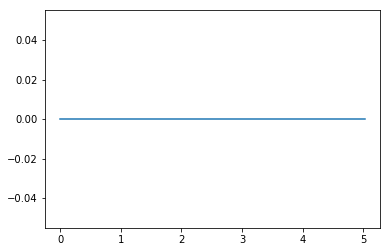

In [3]:
jj = ss.JONSWAP(1000,10,0.0)
x=np.arange(0,jj.N*jj.delta_omega,jj.delta_omega)
y=[]
for i in range(jj.N):
    y.append(jj.waves[i].amp)

plt.plot(x,y)
print(jj.delta_omega)

In [43]:
#reset variables
del ww
del pp
del dd

#create environment JONSWAP(num_waves, T_1, H_third)
T_1 = 6
H_3 = 0.4
ww = ss.JONSWAP(100,T_1,H_3)

In [44]:
pp = ship.Ship(0,0.18)
dt = constants.dt
t=0.0
num =10000
force = 0
prevForce = 0
dl = []
xl = []
xvl = []
xal = []
zl = []
zvl= []
zal =[]
eng = []
pl = []
wil = []
fps = 50
limit = round(round(1./dt)/fps)

maxParams = [0,0,0,0,0,0]

shapes = np.array([
            [6,4],
            [4,4],
            [4,1]])
dd = driver.Driver(shapes)

for i in range(dd.num_layers):
    dd.params[i]=np.random.uniform(-1,1,dd.params[i].shape)


fileList = glob.glob('./output/*.png')
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)

filenamecount = 0
for i in range(num):
    input_array = np.array([pp.accx, pp.accz, pp.velx, pp.velz, pp.angle, prevForce])
    for j in range(input_array.size):
        # print("hoge")
        if(abs(input_array[j])>maxParams[j]): 
            print(maxParams[j])
            maxParams[j] = abs(input_array[j])
        if(maxParams[j]!=0): input_array[j] = input_array[j]/maxParams[j]

    force = dd.output(input_array)
    if(abs(force) > 50): force = math.copysign(50,force)
    prevForce = force
    
    
    pp.update(ww,t,10)

    dl.append(pp.draught)
    xl.append(pp.posx)
    xvl.append(pp.velx)
    xal.append(pp.accx)
    zl.append(pp.posz)
    zvl.append(pp.velz)
    zal.append(pp.accz)
    wil.append(pp.wave_incline)
    pl.append(pp.angle*(180/math.pi))
    eng.append(pp.mass*pp.velz**2)

    #graph
    if(i%limit==0):
        print("fuga")
        xdata = np.arange(-4,8,0.05)
        ydata = np.array([ww.get(x,t) for x in xdata])
        fig, ax = plt.subplots()
        ax.set_xlim(-4.0,8.0)
        ax.set_ylim(-1,1)
        ax.plot(xdata,ydata)
        ax.scatter(pp.posx,pp.posz,s=10)
        
        ts = ax.transData
        coords = ts.transform([pp.posx,pp.posz])
        tr = mpl.transforms.Affine2D().rotate_around(coords[0], coords[1], pp.angle)
        tt = ts + tr
        rec0 = patches.Rectangle((pp.posx-pp.pl/2,pp.posz-pp.ph),pp.pl,pp.ph,linewidth=1,edgecolor='r',facecolor='none', transform=tt)
        ax.add_patch(rec0)

        ax.text(-1.5,0.6,f"Velx = {pp.velx:.2f}[m/s]")
        ax.text(-1.5,-0.6,f"{force:.2f}")

        ax.set_aspect('equal', adjustable='box')

        ax.set_title("Wave Profile T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m], t=" + str(round(t)) + "[s]")
        fig.savefig("./output/"+f"{filenamecount:04d}.png")
        plt.clf()
        plt.close()
        filenamecount += 1
    t+=dt


# os.system("ffmpeg -y -r 50 -f image2 -i ./output/%04d.png -vcodec libx264 -pix_fmt yuv420p ./video/T" + str(T_1) + "_H" + str(H_3) + "_F" + str(force) + ".mp4")
os.system("ffmpeg -y -r 50 -f image2 -i ./output/%04d.png -vcodec libx264 -pix_fmt yuv420p ./video/test.mp4")


008964894882652882
0.008968479062971555
0.00897204326387093
0.00897558751106042
0.00897911183023658
0.008982616247078946
0.008986100787245913
0.008989565476370675
0.008993010340057207
0.008996435403876287
0.008999840693361573
fuga
0.00900322623400573
0.009006592051256588
0.009009938170513375
0.009013264617122967
0.009016571416376209
0.009019858593504263
0.009023126173675025
0.009026374181989568
0.009029602643478645
0.009032811583099237
0.009036001025731143
0.00903917099617362
0.00904232151914207
0.009045452619264774
0.009048564321079668
0.009051656649031176
0.009054729627467074
0.009057783280635412
0.009060817632681482
0.009063832707644824
fuga
0.009066828529456285
0.00906980512193512
0.009072762508786143
0.00907570071359692
0.009078619759835005
0.009081519670845233
0.009084400469847041
0.009087262179931848
0.009090104824060476
0.009092928425060614
0.009095733005624329
0.00909851858830562
0.009101285195518014
0.009104032849532217
0.009106761572473795
0.00910947138632091
0.0091121623129

0

Text(0.5, 1.0, 'Wave Profile T_1 =6[s], H_1/3 =0.4[m], t=10[s]')

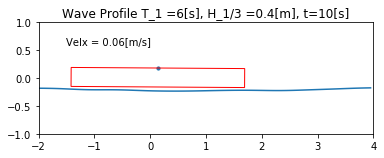

In [45]:
time = 40

xdata = np.arange(-2,4,0.05)
ydata = np.array([ww.get(x,time) for x in xdata])
fig, ax = plt.subplots()
ax.set_xlim(-2.0,4.0)
ax.set_ylim(-1,1)
ax.plot(xdata,ydata)
ax.scatter(pp.posx,pp.posz,s=10)

ts = ax.transData
coords = ts.transform([pp.posx,pp.posz])
tr = mpl.transforms.Affine2D().rotate_around(coords[0], coords[1], pp.angle)
tt = ts + tr
rec0 = patches.Rectangle((pp.posx-pp.pl/2,pp.posz-pp.ph),pp.pl,pp.ph,linewidth=1,edgecolor='r',facecolor='none', transform=tt)
ax.add_patch(rec0)

ax.text(-1.5,0.6,f"Velx = {pp.velx:.2f}[m/s]")
        
ax.set_aspect('equal', adjustable='box')

ax.set_title("Wave Profile T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m], t=" + str(round(t)) + "[s]")


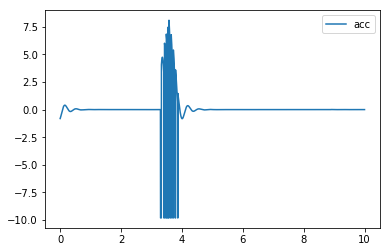

In [46]:
fig, ax = plt.subplots()
tdata = np.arange(0,num*dt,dt)
# ax.set_ylim(-0.5,0.5)
# ax.plot(tdata,xl,label="pos")
# ax.plot(tdata,zvl,label="vel")
ax.plot(tdata,zal,label="acc")
# ax.plot(tdata,dl,label="draught")
# ax.plot(tdata,eng,label="energy")
# ax.plot(tdata,pl,label="pitch angle")
# ax.plot(xl,zl)

# ax.plot(tdata,xvl,label="vel")

ax.legend()

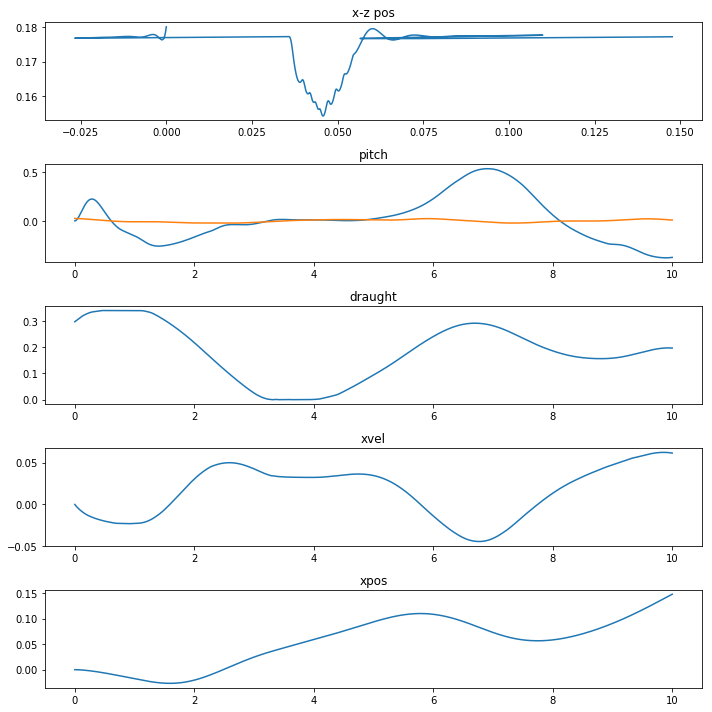

In [47]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5,figsize=(10,10))

ax1.plot(xl,zl)
ax1.set_title('x-z pos')

ax2.plot(tdata,pl)
ax2.plot(tdata,wil)
ax2.set_title('pitch')

ax3.plot(tdata,dl)
ax3.set_title('draught')

ax4.plot(tdata,xvl)
ax4.set_title('xvel')

ax5.plot(tdata,xl)
ax5.set_title('xpos')

fig.tight_layout()